# A Fully Connected Deep Neural Network
## Introduction:
This notebook walks through building a deep neural network to classify images in the Cifar10 dataset. I will start out with building the data pipeline into the machine learning algorithm, build some visualizations for training the model, do some hyper-parameter tuning, then test the results of the best model.

### Cifar10 Dataset
The Cifar10 dataset consists of 50,000 labeled images. I will be using pre-built utility libraries to import the image data, as well as a prebuilt library for checking gradients.

In [36]:
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

np.set_printoptions(precision=4, linewidth=80, suppress=True)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'jet'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.items():
  print('{}:  \t{}'.format(k, v.shape))

y_train:  	(49000,)
X_val:  	(1000, 3, 32, 32)
X_test:  	(1000, 3, 32, 32)
y_test:  	(1000,)
y_val:  	(1000,)
X_train:  	(49000, 3, 32, 32)


##### Visualize the dataset

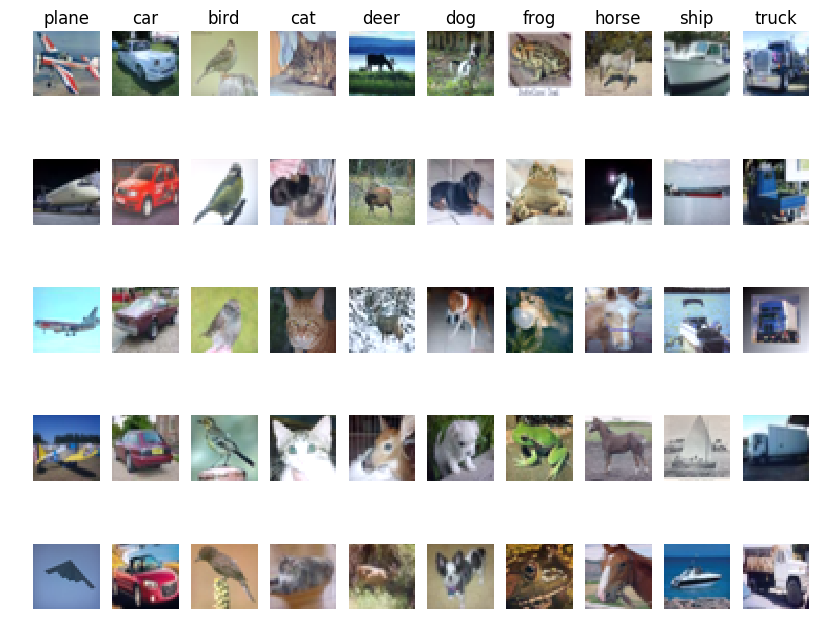

In [44]:
classes = ['plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

num_classes = len(classes)
sample_size = 5
for y, class_name in enumerate(classes):
    
    # Return indexes of class pictures
    idxs = np.flatnonzero(data['y_train'] == y)
    idxs = np.random.choice(idxs, sample_size, replace=False)

    for i, idx in enumerate(idxs):
        
        # Sublot index assignment
        plt_idx = i * num_classes + y + 1
        plt.subplot(sample_size, num_classes, plt_idx)
        
        # Adjust dimensions and brightness of pixel array
        im_X = np.zeros((32, 32, 3))
        for j in range(3):
            im_X[:,:, j] = data['X_train'][idx][j] + 130 * np.ones((32, 32))
            
        # Show row of data
        new_im = np.clip(im_X, 0, 255)
        plt.imshow(new_im.astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(class_name)
            
plt.show()

#### Design and Train the Model

In [ ]:
# Architecture:
architecture = [100, 100, 100, 100]

# Hyper Parameters
p = 0.5  # dropout
w = 1e-2  # weight scale
r = 0.0  # L_2 regularization strength
d = 0.95  # learning rate decay
b = 100  # batch size
e = 10  # number of epochs
learning_params = {  # Configs for Adam
    'learning_rate': 1e-3,
    'beta1': 0.9,  # Decay rate for moving average of first moment of gradient
    'beta2': 0.999,  # Decay for moving average of second moment of gradient
    'epsilon': 1e-8,  # Just prevents a divide by zero scenario
}

DeepNet = FullyConnectedNet(hidden_dims=architecture,
                          input_dim=3*32*32, num_classes=10,
                          dropout=p, use_batchnorm=True,
                          reg=r, weight_scale=w,
                          dtype=np.float32, seed=None)

trainer = Solver(DeepNet, data,
                 update_rule='adam',
                 optim_config=learning_params,
                 lr_decay=d, batch_size=b, num_epochs=e,
                 print_every=100, verbose=True)

trainer.train()